<a href="https://colab.research.google.com/github/ronnie9723/ai-lab-project-credit-card-fraud-detection/blob/main/AI_LAB_PROJECT_PC-B_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mount To drive**

In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Importing packages**

In [5]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric


# **Access file and read file**

In [36]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/creditcard.csv')

In [34]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**Case Counting** & **Statistics**

In [40]:
cases = len(df)
normal_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])

print(cl('CASE COUNT'))
print(cl('--------------------------------------------'))
print(cl('Total number of cases are {}'.format(cases)))
print(cl('Number of Normal cases are {}'.format(normal_count)))
print(cl('Number of fraud cases are {}'.format(fraud_count)))
print(cl('--------------------------------------------'))


CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Normal cases are 284315
Number of fraud cases are 492
--------------------------------------------


In [41]:
normal_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS'))
print(cl('--------------------------------------------'))
print(cl('Normal CASE AMOUNT STATS'))
print(normal_cases.Amount.describe())
print(cl('--------------------------------------------'))
print(cl('FRAUD CASE AMOUNT STATS'))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------'))

CASE AMOUNT STATISTICS
--------------------------------------------
Normal CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


#**Feature Selection & Data Split**

In [58]:
X = df.drop('Class' ,axis =1 ).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(cl('X_train samples : '), X_train[:1])
print(cl('X_test samples : '), X_test[0:1])
print(cl('y_train samples : '), y_train[0:10])
print(cl('y_test samples : '), y_test[0:10])

X_train samples :  [[ 1.43608000e+05 -2.54247952e-01  3.78696549e-01 -4.59987329e-01
  -2.31420666e+00  1.35718605e+00  4.44650201e-01  5.45702684e-01
   2.33313547e-01 -1.26280422e+00 -6.08920001e-01  1.32989064e-01
  -4.68449211e-01  4.54194291e-01 -1.50920168e+00 -1.09971226e-01
   3.25173956e-01  1.83973007e+00 -2.72705242e+00 -1.21915100e+00
   1.13953494e-01  4.68344712e-02  2.71405626e-01 -5.49091976e-02
  -4.41446166e-01  2.87822460e-02 -2.99856952e-01  2.93874145e-01
   9.43107675e-02  1.50000000e+01]]
X_test samples :  [[ 6.32420000e+04  1.23328485e+00 -9.71693378e-01  9.18323443e-01
  -7.55859732e-01 -1.44869351e+00  3.55694803e-02 -1.28754226e+00
   3.13872782e-01 -3.99567122e-01  7.71335351e-01  1.30096622e+00
  -7.90622727e-01 -1.53451646e+00  1.30383965e-01  8.61509033e-01
   1.46939065e+00  1.83431337e-01 -5.86196710e-01  1.57948073e-01
   1.51438917e-02  4.57435792e-01  1.12534186e+00 -8.90001296e-02
   2.73842051e-02  2.55258964e-01 -3.44255128e-02  3.34538785e-02
   

#**Modeling** *(Algorithms)*

In [15]:
# 1. Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

In [16]:
# 2. K-Nearest Neighbors
n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

In [17]:
# 3. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#**Evaluation**

In [76]:
#Accuracy Score
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9967873319054809
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9969979986657772
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9970506653558513
------------------------------------------------------------------------


#**Confusion Matrix**

In [23]:
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression


In [25]:
# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)


# 1. Decision tree

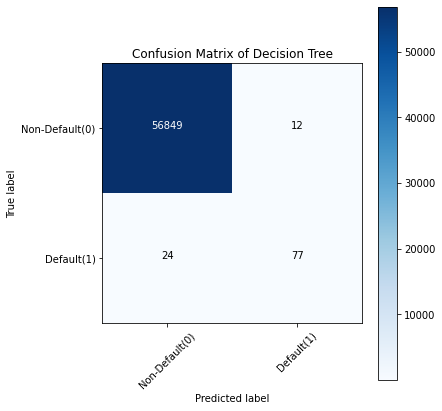

In [26]:
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()


# 2.KNN


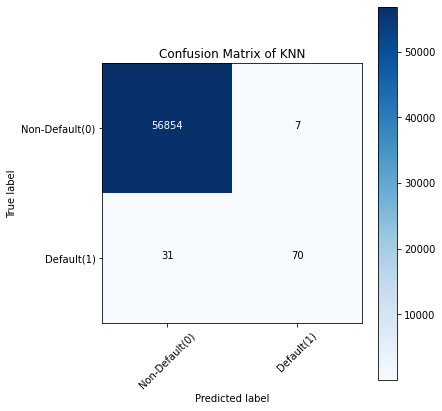

In [27]:
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()


# 3. Logistic regression

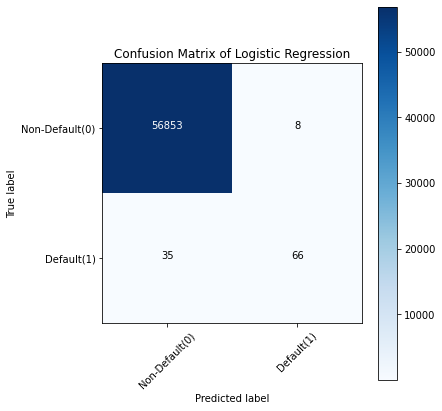

In [28]:
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()